# Outline 

- [Exploring the dataset](#Exploring-the-dataset)
  - [Loading the dataset](#Loading-the-dataset)
  - [Adding a new categorical feature](#Adding-a-new-categorical-feature)
- [Visualization](#Visualization)
  - [Count plot for a categorical variable](#Count-plot-for-a-categorical-variable)
  - [Numerical variable distribution](#Numerical-variable-distribution)
  - [Boxplots](#Boxplots)
- [Preprocessing the data](#Preprocessing-the-data)
  - [Preprocessing categorical variables](#Preprocessing-categorical-variables)


### Loading the dataset

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl 
plt.style.use("dark_background")

In [5]:
df = pd.read_csv("../data/credit_dataset.csv", index_col=0)

In [6]:
df = df.sample(frac=1).reset_index(drop=True) # randomly shuffle rows of the df
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,29124,MORTGAGE,0.0,MEDICAL,E,8875,15.68,1,0.30,Y,3
1,23,48000,RENT,5.0,DEBTCONSOLIDATION,B,5000,9.25,0,0.10,N,2
2,30,70000,RENT,6.0,PERSONAL,B,5000,11.71,0,0.07,N,5
3,24,54600,RENT,2.0,EDUCATION,C,7200,12.53,0,0.13,N,2
4,22,49500,RENT,7.0,MEDICAL,C,2500,14.27,0,0.05,Y,2


In [7]:
# Check for amount of rows and for any missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
#create quickaccess list with categorical variables labels
catvars = list(df.select_dtypes(include = 'object').columns)
#create quickaccess list with numerical variables labels
numvars = list(df.select_dtypes(exclude = 'object').columns)
numvars.remove("loan_status")

In [9]:
# Threshold, splitting 70% train, 30% testing
threshold = 0.7*len(df)

# Splitting the dataset
df_train = df.loc[:threshold].reset_index(drop=True)
df_test = df.loc[threshold:].reset_index(drop=True)

In [10]:
print("We have {} training samples".format(len(df_train)))
print("We have {} testing samples".format(len(df_test)))

We have 22807 training samples
We have 9774 testing samples


### 1.2 Adding a new categorical feature

In [11]:
# Describe numerical features of the training set
df_train[numvars]
df_train[numvars].describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,22807.000000,2.280700e+04,22807.000000,22807.000000,22807.000000,22807.000000,22807.000000
mean,27.722804,6.588239e+04,4.776121,9575.198404,11.009899,0.170647,5.805411
std,6.316611,6.545265e+04,4.147287,6317.638722,3.081069,0.107188,4.040260
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,8.490000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.885100e+04,7.000000,12000.000000,13.110000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,22.110000,0.830000,30.000000


---
Create a new categorical feature named `category_income` assigning a category 'A', 'B', 'C' and 'D' according to the feature `person_income` as follows:
  * If `person_income` is in [0, 39000], then `category_income = 'D'`.
  * If `person_income` is in [39000, 55000], then `category_income = 'C'`.
  * If `person_income` is in [55000, 79000], then `category_income = 'B'`.
  * If `person_income` is in [79000, +$\infty$], then `category_income = 'A'`.
---

In [12]:
df_train["person_income"].describe()

count    2.280700e+04
mean     6.588239e+04
std      6.545265e+04
min      4.000000e+03
25%      3.840000e+04
50%      5.500000e+04
75%      7.885100e+04
max      6.000000e+06
Name: person_income, dtype: float64

In [13]:
# Income intervals
intervals = (0, 39000, 55000, 79000, 6000000)
# Categories
categories = ["D", "C", "B", "A"]
# Create the new feature
df_train["category_income"] = pd.cut(df_train.person_income, intervals, labels=categories)
df_test["category_income"] = pd.cut(df_test.person_income, intervals, labels=categories)
# Add the new category `category_income` to the list of categorical variables
catvars.append("category_income")

# 2. Visualization

In [14]:
# The different values of person_home_ownsership
df_train["person_home_ownership"].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'OTHER'], dtype=object)

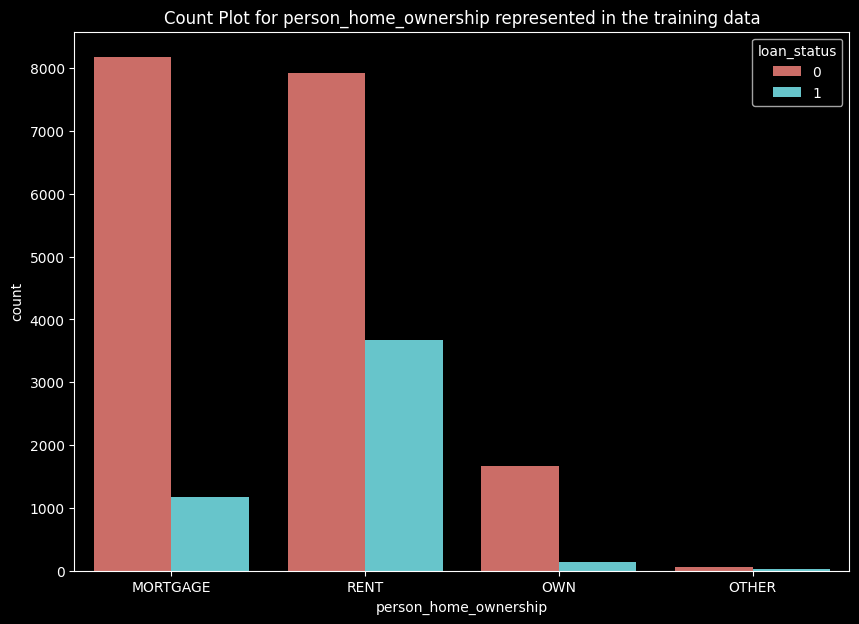

In [15]:
fig = plt.figure(figsize=(10, 7))
g = sns.countplot(x="person_home_ownership", data=df_train, palette="hls", hue="loan_status")
g.set_title("Count Plot for person_home_ownership represented in the training data")
plt.show()

### 2.2 Numerical variable distribution

Plot a univariate distribution of a numerical variable associated to the "0" and "1" targets. 

<Figure size 1400x700 with 0 Axes>

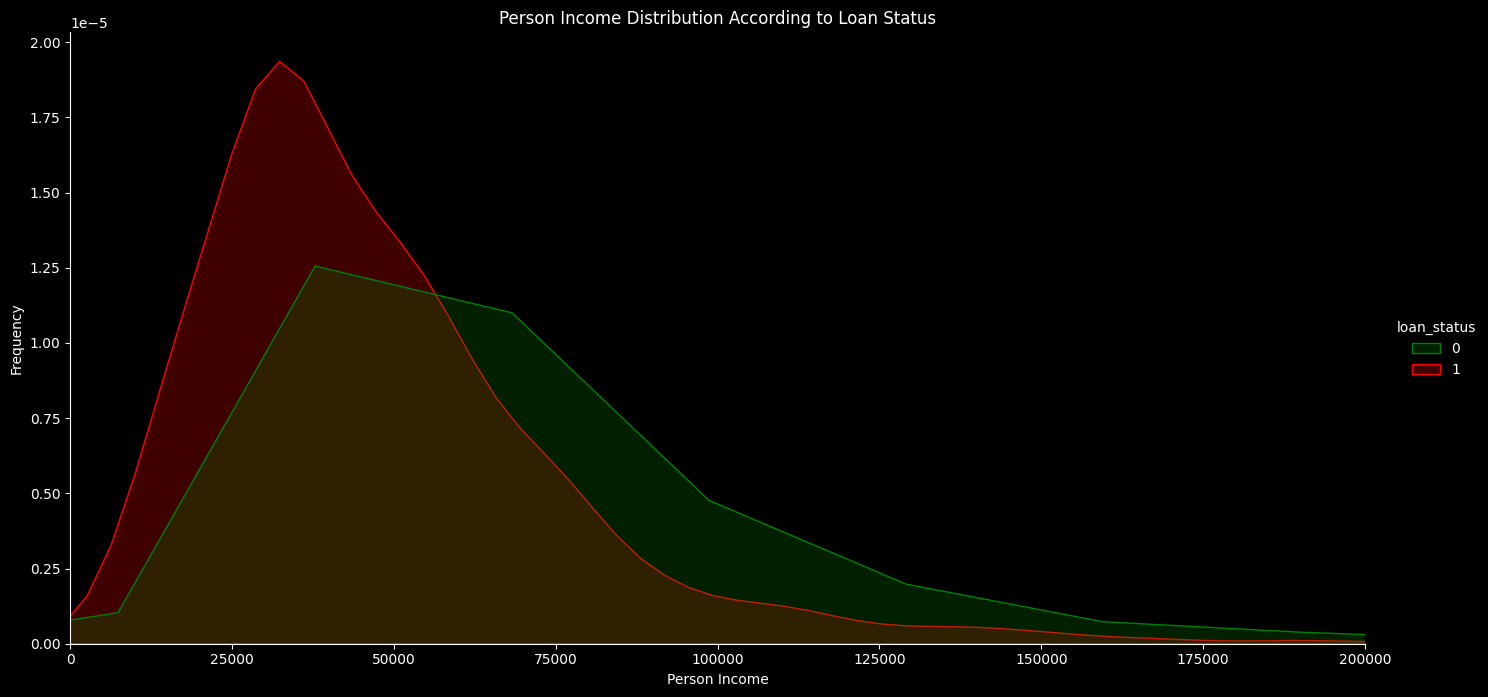

In [16]:
plt.figure(figsize=(14, 7))

sns.displot(data=df_train, x="person_income", hue="loan_status", kind="kde", 
            fill=True, common_norm=False, palette=["g", "r"], height=7, aspect=2)

plt.xlabel("Person Income")
plt.xlim(0, 200000)
plt.ylabel("Frequency")
plt.title("Person Income Distribution According to Loan Status")
plt.show()

---

We can see that the distribution of `person_income` associated the target '0' (No default) is shifted to the right, in comparison with the one associated with the target '1' (default).

---

### 2.3 Boxplots 

---

The distribution of the numerical feature `loan_amnt` according to the new categorical variable `category_income` and the targets `loan_status`. 

---

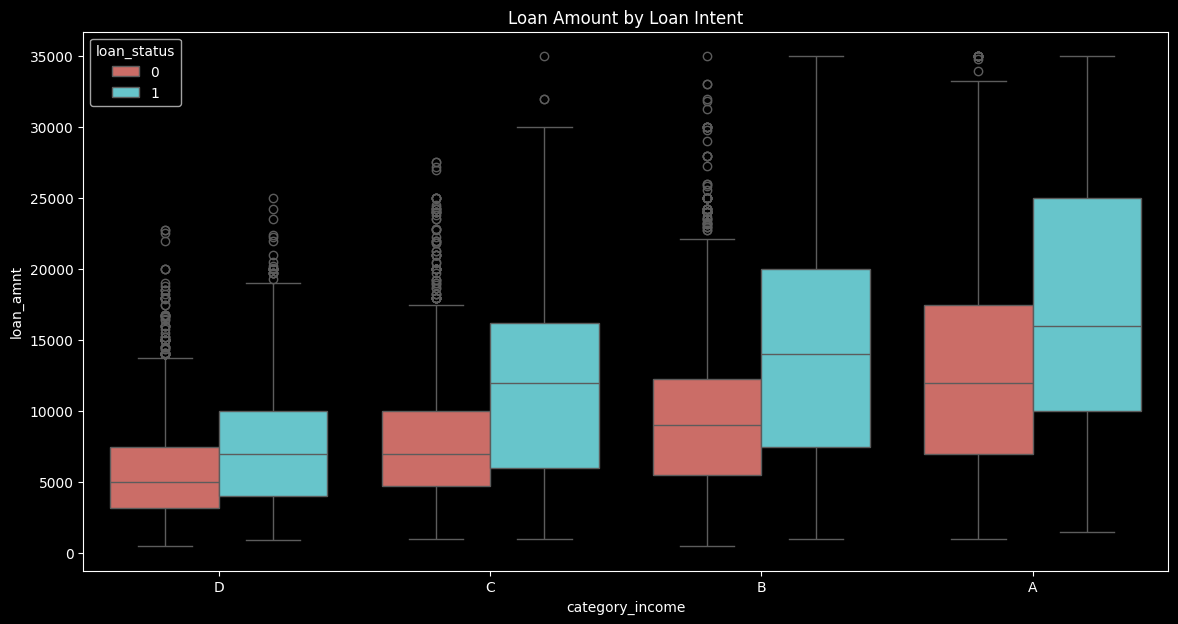

In [17]:
fig = plt.figure(figsize=(14, 7))
g = sns.boxplot(x="category_income", y="loan_amnt", data=df_train, palette="hls",hue="loan_status")
g.set_title("Loan Amount by Loan Intent")
plt.show()

# 3. Preprocessing the data

### 3.1. Preprocessing categorical variables 

* Let's suppose we have a categorical variable X that can take K different values $\{1, \dots, K\}$

* **One hot encoding** a category consists in transforming the category into a vector $\in \mathbb{R}^K$ where we have 1 in the position of the category and zeros elswhere. 

* For instance, if $K=4$, the category "3" for one sample is one hot encoded into the vector $[0, 0, 1, 0]$


* Therefore, we can turn a catogorical feature into K features. 

* As each sample is only mapped to one category, the K features are not independent (the K-th feature can be deduced from the K-1 first features). Therefore, we usually drop one of the columns.

The categories:

In [18]:
catvars

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'category_income']

In [19]:
for categorical_variable in catvars:
  print(f"Feature: {categorical_variable} ... Categories: {df_train[categorical_variable].unique()}")

Feature: person_home_ownership ... Categories: ['MORTGAGE' 'RENT' 'OWN' 'OTHER']
Feature: loan_intent ... Categories: ['MEDICAL' 'DEBTCONSOLIDATION' 'PERSONAL' 'EDUCATION' 'HOMEIMPROVEMENT'
 'VENTURE']
Feature: loan_grade ... Categories: ['E' 'B' 'C' 'A' 'D' 'F' 'G']
Feature: cb_person_default_on_file ... Categories: ['Y' 'N']
Feature: category_income ... Categories: ['D', 'C', 'B', 'A']
Categories (4, object): ['D' < 'C' < 'B' < 'A']


The number of categories:

In [20]:
# For each categorical variable, the number of possible categories
df_train[catvars].nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
category_income              4
dtype: int64

In [21]:
# 1 for target (loan_status)
# 5 categorical variables
# 7 numerical variables 
df_train.shape

(22807, 13)

In [23]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df_train[catvars])

# Create a DataFrame with the one-hot encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(catvars))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_train = pd.concat([df_train.drop(columns=catvars), encoded_df], axis=1)


c:\Users\K$\source\repos\consumer_loans\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
